In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import matplotlib.pyplot as plt
import re
import itertools
import os
import pandas as pd
import numpy as np
import json
from src import feature_extraction
from src import baseline_model_training
from src import matrix_construction

In [3]:
with open('config/data-params.json') as f:
    params = json.load(f)
sitemap = params['sitemap']
out = params['path']
num = params['num']
cat = params['cat']
malware_path = params['malware']

In [4]:
df1 = feature_extraction.generate_df(out, cat[0])
df2 = feature_extraction.generate_df(out, cat[1])

In [5]:
app_df = pd.concat([df1,df2])

**Benign App DataFrame**

In [5]:
app_df

,app_names,num_code_block,num_uni_block,num_api,num_uni_api,num_package,num_uni_package,num_invoke,category
0,com.barilab.handmirror.googlemarket,46518,42950,151476,26212,155257,7874,155257,beauty
1,com.jkfantasy.camera.jkpmirrorcamera,19830,18644,71771,12568,73118,3891,73118,beauty
2,yamayka.apps.NailsTutorial,27242,26150,88956,19975,90499,4663,90499,beauty
3,com.mobincube.android.sc_3HJUC5,48809,46253,185977,34607,189372,8476,189372,beauty
4,com.beautytalk.android,53370,50844,192683,37697,196413,8312,196413,beauty
5,com.ulta,0,0,0,0,0,0,0,beauty
6,com.skollabs.nails,31288,28726,110608,18163,112033,5525,112033,beauty
7,com.sephora,0,0,0,0,0,0,0,beauty
9,com.abto.morenails,13139,11496,50303,7970,51128,2882,51128,beauty
10,yamayka.apps.Makeup,27245,26152,88975,19978,90518,4664,90518,beauty


In [13]:
app_df[app_df.num_api != 0].describe()

,num_code_block,num_uni_block,num_api,num_uni_api,num_package,num_uni_package,num_invoke,category
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000
mean,33960.656250,32137.093750,113903.937500,22448.125000,116411.468750,5603.65625,116411.468750,0.562500
std,14877.156333,14068.106607,52284.076134,9612.621517,53393.838299,2368.85122,53393.838299,0.504016
min,37.000000,37.000000,134.000000,70.000000,135.000000,24.00000,135.000000,0.000000
25%,27241.750000,26149.750000,88955.750000,19380.000000,90498.750000,4631.25000,90498.750000,0.000000
50%,34350.000000,32231.000000,112815.000000,22906.000000,115726.000000,5707.50000,115726.000000,1.000000
75%,43259.250000,40274.750000,157623.500000,27079.500000,161225.000000,7941.75000,161225.000000,1.000000
max,55037.000000,51983.000000,192683.000000,37697.000000,196413.000000,9023.00000,196413.000000,1.000000


**Number of benign App sampled**

In [7]:
len(app_df)

36

**Histogram**

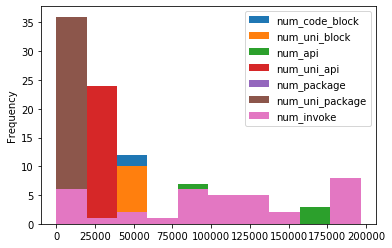

In [8]:
app_df.plot.hist()

In [11]:
app_df['category'] = (app_df.category == 'beauty').astype(int)

### beauty category

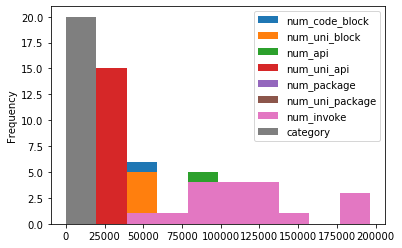

In [14]:
app_df[app_df.category == 1].plot.hist()

### communication category

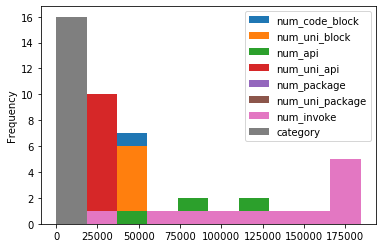

In [15]:
app_df[app_df.category == 0].plot.hist()

In [6]:
benign_smali1 = feature_extraction.all_smali(feature_extraction.get_sub_dir(out + '/' + cat[0]))

In [7]:
benign_smali2 = feature_extraction.all_smali(feature_extraction.get_sub_dir(out + '/' + cat[1]))

In [8]:
beauty = pd.DataFrame(benign_smali1)
communication = pd.DataFrame(benign_smali2)

In [9]:
together = beauty.append(communication, ignore_index = True)

In [12]:
A, apis = matrix_construction.A(together)

In [23]:
sum_api = pd.DataFrame(A.todense(), columns = apis).sum().to_frame()

### Number of APIs appear once only

In [25]:
len(sum_api[sum_api[0] == 1])

229858

When matrix B gets too large, this data can be helpful by removing all API calls appear only once.

## Baseline Model

In [26]:
df = app_df.sample(frac=1, axis=0).reset_index(drop=True).drop('app_names', 1)

### Logistic Regression

In [29]:
baseline_model_training.Logistic_Regression(df, df, 'category')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(5, 11, 7, 13)

### Random Forest

In [30]:
baseline_model_training.Random_Forest(df, df, 'category')

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(12, 4, 5, 15)

### GBC

In [31]:
baseline_model_training.GBC(df, df, 'category')

(16, 0, 2, 18)

In [1]:
import re
import itertools
import os
import pandas as pd
import requests
import glob, os
import gzip
import numpy as np
from bs4 import BeautifulSoup
import json
from os import listdir
from os.path import isfile, join
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

In [2]:
def app_to_smali(path):
    smalis = []
    for d, dirs, files in os.walk(path + '/smali/'):
        for f in files:
            if f.endswith('smali'):
                smalis.append(os.path.join(d, f))
    smali_text = [open(s, 'r').read() for s in smalis]
    return '\n'.join(smali_text)

In [7]:
#def all_smali(mypath):
#    names = os.listdir(mypath)
#    sub_dir = [os.path.join(mypath, o) for o in os.listdir(mypath) 
#                    if os.path.isdir(os.path.join(mypath,o))]
#    smali_by_app = []
#    for i in sub_dir:
#        smali_by_app += [app_to_smali(i)]
#    return smali_by_app

In [24]:
df1 = generate_df('data', 'communication')

In [25]:
df2 = generate_df('data', 'beauty')

In [26]:
app_df = pd.concat([df1,df2])

In [23]:
def generate_df(out, cat):
    names = os.listdir(out + '/' + cat)
    num_code_block = []
    num_uni_block = []
    num_api = []
    num_uni_api = []
    num_package = []
    num_uni_package = []
    num_invoke = []
    most_freq_package = []
    for app in names:
        i = app_to_smali(out + '/' + cat + '/' + app)
        block = by_code_block(i)
        api = by_api(i)
        package = by_package(i)
        invoke = by_invoke(i)

        num_uni_block += [block[0]]
        num_code_block += [block[1]]
        num_uni_api += [api[0]]
        num_api += [api[1]]
        num_uni_package += [package[0]]
        num_package += [package[1]]
        num_invoke += [invoke[0]]
    df = pd.DataFrame({'app_names': names, 'num_code_block': num_code_block, 
                       'num_uni_block': num_uni_block, 'num_api': num_api, 
                       'num_uni_api': num_uni_api, 'num_package': num_package,
                       'num_uni_package': num_uni_package, 'num_invoke': num_invoke,
                       'category': cat})
    return df[df['app_names']!='.ipynb_checkpoints']

In [4]:
def by_code_block(smalitxt):
    pattern = re.compile('\.method([\S\s]*?)\.end method')
    code_blocks = re.findall(pattern, smalitxt)
    return len(set(code_blocks)), len(code_blocks), code_blocks#not unique!!

In [5]:
def by_api(smalitxt):
    pattern = re.compile('(invoke-.*?)\\n\\n')
    api = re.findall(pattern, smalitxt)
    return len(set(api)), len(api), api#not unique!!

In [6]:
def by_package(smalitxt):
    packages = re.findall('invoke-.*? {.*?}. (\[*[ZBSCFIJD]|\[*L[\w\/$-]+;)->', smalitxt)
    total = len(packages)
    return len(set(packages)), total

In [7]:
def by_invoke(smalitxt):
    invokes = re.findall('invoke-(\w+)(?:\/range)? {', smalitxt)
    total = len(invokes)
    return total, invokes

In [8]:
def list_package(apis):
    packages = []
    for api in apis:
        pac = api_to_package(api)
        packages += [pac]
    return packages

In [9]:
def list_invoke(apis):
    invokes = []
    for api in apis:
        ivk = api_to_invoke_method(api)
        invokes += [ivk]
    return invokes

In [10]:
def api_to_package(api):
    pattern = re.compile('invoke-.*? {.*?}. (\[*[ZBSCFIJD]|\[*L[\w\/$-]+;)->')
    package = re.search(pattern, api)
    return package[1]

In [11]:
def api_to_invoke_method(api):
    pattern = re.compile('invoke-(\w+)(?:\/range)? {')
    invoke = re.search(pattern, api)
    return invoke[1]